In [11]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
from matplotlib import dates as mdates
from matplotlib import pyplot
from pylab import rcParams
rcParams['figure.figsize'] = 10, 5

def graph1(labels, men_means, women_means, label_1, label_2, title):
    #labels = ['G1']
    #men_means = [len(users)]
    #women_means = [active]

    x = np.arange(len(labels))  # the label locations
    width = 0.35  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width/2, men_means, width, label=label_1)
    rects2 = ax.bar(x + width/2, women_means, width, label=label_2)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_ylabel('')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

    fig.tight_layout()

    plt.show()

    
def graph2(objects, performance, ylabel, title):
    y_pos = np.arange(len(objects))

    plt.bar(y_pos, performance, align='center')
    plt.xticks(y_pos, objects)
    plt.ylabel(ylabel)
    plt.title(title)

    plt.show()
    
    
def graph3(labels, class_1, class_2, class_3, label_1, label_2, label_3, title, show_desc):
    #labels = ['G1']
    #men_means = [len(users)]
    #women_means = [active]

    x = np.arange(len(labels))  # the label locations
    width = 0.15  # the width of the bars

    fig, ax = plt.subplots()
    rects1 = ax.bar(x - width, class_1, width, label=label_1)
    rects2 = ax.bar(x, class_2, width, label=label_2)
    rects3 = ax.bar(x+ width, class_3, width, label=label_3)

    # Add some text for labels, title and custom x-axis tick labels, etc.
    #ax.set_ylabel('')
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend()


    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax.annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')

    if show_desc:
        autolabel(rects1)
        autolabel(rects2)
        autolabel(rects3)

    fig.tight_layout()

    plt.show()


def graph4(Data, x, y, title):
    #convert strings into datetime objects
    conv_time = [datetime.datetime.strptime(i, "%H:%M:%S") for i in Data]
    #define bin number
    bin_nr = 24
    fig, ax = plt.subplots(1,1)
    #create histogram, get bin position for label
    _counts, bins, _patches = ax.hist(conv_time, bins = bin_nr)
    #set xticks at bin edges
    plt.xticks(bins)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    #reformat bin label into format hour:minute
    ax.xaxis.set_major_formatter(mdates.DateFormatter("%H"))
    plt.show()
    
    
def graph5(d, x, y, title):
    n, bins, patches = plt.hist(x=d, bins='auto', rwidth=0.85)
    plt.grid(axis='y', alpha=0.75)
    plt.xlabel(x)
    plt.ylabel(y)
    plt.title(title)
    maxfreq = n.max()
    # Set a clean upper y-axis limit.
    plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
    plt.show()
    
    
def graph6(class1, class2):
    N = len(class1)

    ind = np.arange(N)    # the x locations for the groups
    width = 0.35       # the width of the bars: can also be len(x) sequence

    p1 = plt.bar(ind, class1, width)
    p2 = plt.bar(ind, class2, width, bottom=class1)

    plt.ylabel('Scores')
    plt.title('Scores by group and gender')
    plt.legend((p1[0], p2[0]), ('Men', 'Women'))

    plt.show()

2800
34
695
387
234
1651
2
1
161
484


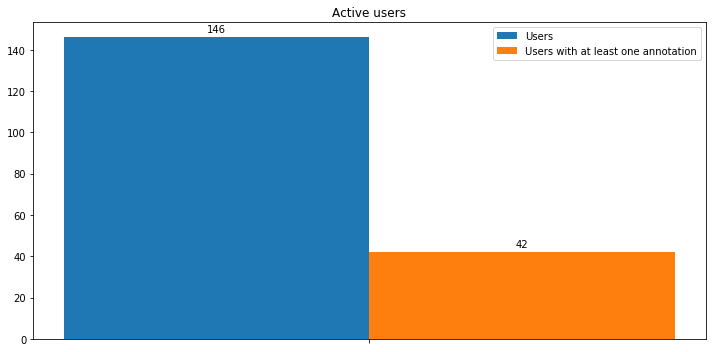

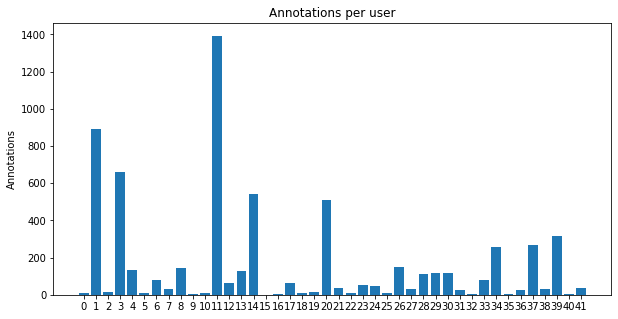

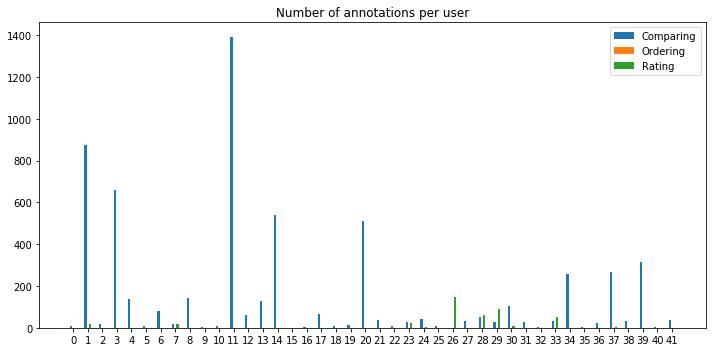

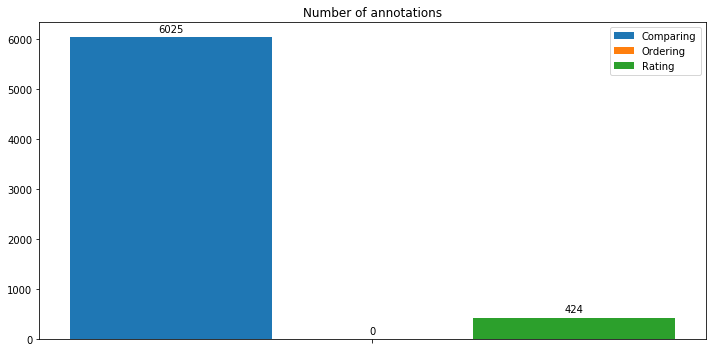

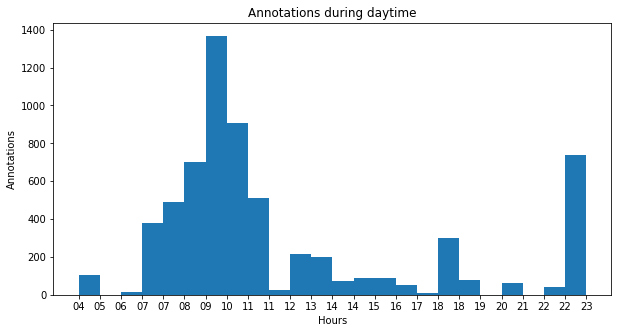

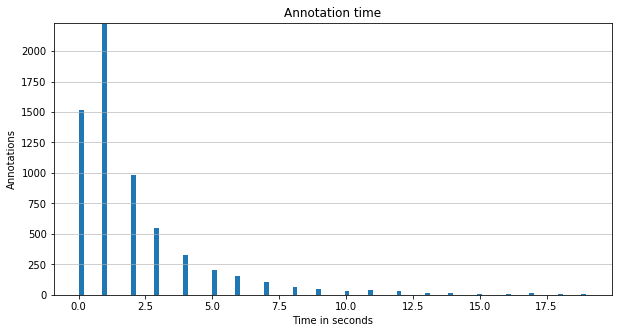

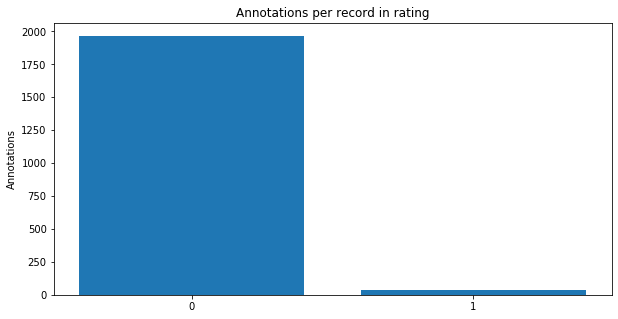

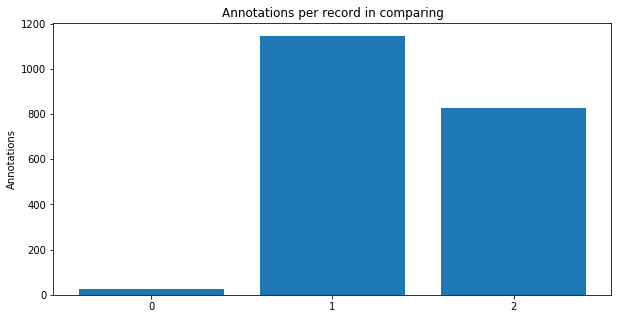

ZeroDivisionError: division by zero

In [12]:
import datetime
import collections

import numpy as np
from numpy.random import rand
from numpy.random import seed

from sqlalchemy import create_engine
from sqlalchemy.orm import scoped_session, sessionmaker
from sqlalchemy import func
from app.db import Base, User, Annotation, Crop, Page, Record, Set, RecordCrop

    
if __name__ == "__main__":
    engine = create_engine('sqlite:///C:\\Users\\LachubCz_NTB\\Documents\\GitHub\\pero-web-data\\database.sqlite3',
                           convert_unicode=True,
                           connect_args={'check_same_thread': False})
    db_session = scoped_session(sessionmaker(autocommit=False,
                                             autoflush=False,
                                             bind=engine))
    Base.query = db_session.query_property()
    Base.metadata.create_all(bind=engine)

    users = User.query.all()
    sets = Set.query.all()
    
    for e, elem in enumerate(sets):
        counter = 0
        for i, item in enumerate(elem.records):
            if len(item.annotations) > 0:
                    counter += len(item.annotations)
        print(counter)
    set_types = dict()
    for i, item in enumerate(sets):
        set_types[item.id] = item.type

    active = 0
    annotations = []
    for i, item in enumerate(users):
        
        #print(len(users[i].annotations))
        if len(users[i].annotations) > 0:
            annotations.append(len(users[i].annotations))
            active += 1
    
    graph1(labels=[''], men_means=[len(users)], women_means=[active], label_1="Users", label_2="Users with at least one annotation", title='Active users')
    graph2(objects=tuple(i for i in range(len(annotations))), performance=annotations, ylabel="Annotations", title="Annotations per user")
    
    comparing_ = []
    ordering_ = []
    rating_ = []
    for i, item in enumerate(users):
        comparing = 0
        ordering = 0
        rating = 0

        for e, elem in enumerate(item.annotations):
            if set_types[elem.record.set_id] == 0:
                comparing += 1
            elif set_types[elem.record.set_id] == 1:
                ordering += 1
            elif set_types[elem.record.set_id] == 2:
                rating += 1
                
        if comparing > 0 or ordering > 0 or rating > 0:
            comparing_.append(comparing)
            ordering_.append(ordering)
            rating_.append(rating)

    graph3(labels=[i for i in range(len(comparing_))], class_1=comparing_, class_2=ordering_, class_3=rating_, label_1="Comparing", label_2="Ordering", label_3="Rating",title='Number of annotations per user', show_desc=False)
    graph3(labels=[''], class_1=sum(comparing_), class_2=sum(ordering_), class_3=sum(rating_), label_1="Comparing", label_2="Ordering", label_3="Rating",title='Number of annotations', show_desc=True)
    
    annotations = Annotation.query.all()

    timestamps = []
    annotation_time = []
    for i, item in enumerate(annotations):
        timestamps.append(str(item.timestamp)[11:])
        time = str(item.annotation_time).replace('0000', '').split('.')[0].split(":")
        time = int(time[0]) * 3600 + int(time[1]) * 60 + int(time[2])
        if time < 20:
            annotation_time.append(time)

    graph4(Data=timestamps, x="Hours", y="Annotations", title="Annotations during daytime")
    graph5(d=annotation_time, x="Time in seconds", y="Annotations", title="Annotation time")
    
    records = Record.query.all()
    annotations_per_record_comp = dict()
    annotations_per_record_rate = dict()
    for i, item in enumerate(records):
        if item.set_id == 1:
            if len(item.annotations) in annotations_per_record_comp.keys():
                annotations_per_record_comp[len(item.annotations)] += 1
            else:
                annotations_per_record_comp[len(item.annotations)] = 1
        elif item.set_id == 2:
            if len(item.annotations) in annotations_per_record_rate.keys():
                annotations_per_record_rate[len(item.annotations)] += 1
            else:
                annotations_per_record_rate[len(item.annotations)] = 1
                
    annotations_per_record_rate = collections.OrderedDict(sorted(annotations_per_record_rate.items()))
    annotations_per_record_comp = collections.OrderedDict(sorted(annotations_per_record_comp.items()))
    graph2(objects=list(annotations_per_record_rate.keys()), performance=list(annotations_per_record_rate.values()), ylabel="Annotations", title="Annotations per record in rating")
    graph2(objects=list(annotations_per_record_comp.keys()), performance=list(annotations_per_record_comp.values()), ylabel="Annotations", title="Annotations per record in comparing")
    
    records = Record.query.filter(Record.set_id==1).all()
    
    class1 = []
    class2 = []
    for i, item in enumerate(records):
        one = 0
        two = 0
        for e, elem in enumerate(item.annotations):
            if elem.annotation == '01':
                one += 1
            else:
                two += 1
        class1.append(one)
        class2.append(two)
    #graph6(class1, class2)
    
    combinations = dict()
    for i, item in enumerate(class1):
        _100 = class1[i]+class2[i]
        if class1[i]>class2[i]:
            string = (class1[i] / _100)*100
        else:
            string = (class2[i] / _100)*100
        if string in combinations.keys():
            combinations[string] += 1
        else:
            combinations[string] = 1
    
    combinations = collections.OrderedDict(sorted(combinations.items()))
    graph2(objects=list(combinations.keys()), performance=list(combinations.values()), ylabel="% of same annotations", title="Annotations consistency")